<a href="https://colab.research.google.com/github/22f3001059/MLP/blob/main/MLP_25T1_OPPE1_22f3001059.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MLP 2025 Term 1 OPPE 1
**Date:** 1 Mar 2025

In [100]:
# @title Student's Details to be filled before the exam starts: { run: "auto", vertical-output: true, form-width: "100%", display-mode: "form" }

Student_Name = "GAURANG NIGAM" # @param {type:"string"}
Student_Roll_No = "22F3001059" # @param {type:"string"}

try:
  if len(Student_Name) == 0:
    raise ValueError("Warning:  Please write your name")
  elif len(Student_Roll_No)==0:
    raise ValueError("Warning: Please write your roll number")

  else:
    print(f"Best Of Luck {Student_Name}({Student_Roll_No})")

except ValueError as e:
  print(e)

Best Of Luck GAURANG NIGAM(22F3001059)


# Unit 1 of 2: Preprocessing

### Q. 1: Which dataset are you using for this exam?

[ ] MLP25T1_preprocessing_V1

[ ] MLP25T1_preprocessing_V2

[✅] MLP25T1_preprocessing_V3

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [137]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('MLP25T1_preprocessing_V3.csv')
df.head()

Saving MLP25T1_preprocessing_V3.csv to MLP25T1_preprocessing_V3 (5).csv


,Age,Gender,Annual Income,Number of Dependents,Education Level,Health Score,Location,Policy Type,Active Policy days,Previous Claims,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,29.0,Male,7264.0,1.0,PhD,14.596538,Suburban,Premium,1521,0.0,719.0,6.0,Average,Yes,Monthly,Condo,519.0
1,58.0,Female,3719.0,3.0,High School,46.759601,Suburban,Basic,1091,0.0,774.0,9.0,Poor,No,Daily,House,2909.0
2,58.0,Male,1688.0,3.0,Master's,21.595907,Suburban,Comprehensive,329,0.0,793.0,1.0,Poor,No,Daily,Condo,36.0
3,64.0,Male,14331.0,NaN,Bachelor's,36.913800,Suburban,Comprehensive,579,0.0,403.0,8.0,Poor,No,Monthly,Condo,1121.0
4,36.0,Male,48596.0,0.0,High School,14.836322,Rural,Comprehensive,1213,0.0,667.0,9.0,Poor,Yes,Weekly,Apartment,182.0


### Q. 2: Which of the following columns have object datatype?

Location

Health Score

Exercise Frequency

Insurance Duration

Property Type

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9847 non-null   float64
 1   Gender                10000 non-null  object 
 2   Annual Income         9628 non-null   float64
 3   Number of Dependents  9071 non-null   float64
 4   Education Level       10000 non-null  object 
 5   Health Score          9373 non-null   float64
 6   Location              10000 non-null  object 
 7   Policy Type           10000 non-null  object 
 8   Active Policy days    10000 non-null  int64  
 9   Previous Claims       10000 non-null  float64
 10  Credit Score          8895 non-null   float64
 11  Insurance Duration    10000 non-null  float64
 12  Customer Feedback     9338 non-null   object 
 13  Smoking Status        10000 non-null  object 
 14  Exercise Frequency    10000 non-null  object 
 15  Property Type       

In [139]:
df.select_dtypes(include='object').columns

Index(['Gender', 'Education Level', 'Location', 'Policy Type',
       'Customer Feedback', 'Smoking Status', 'Exercise Frequency',
       'Property Type'],
      dtype='object')

#### Q. 3: In this dataset, what is the most common Exercise Frequency among customers aged strictly above 40 living in Urban locations and having a Health Score strictly above 50


In [143]:
df[(df["Age"]>40 ) & (df["Location"]=="Urban") & (df["Health Score"]>50)]["Exercise Frequency"].value_counts()

,count
Exercise Frequency,
Weekly,13
Daily,10
Monthly,9
Rarely,8


#### Q. 4: Which of the following options represent all the unique categories present in the Education Level feature?

['High School', "Master's", "Bachelor's", 'PhD', 'Post Doc']

['High School', "Master's", "Bachelor's"]

['High School', "Master's", "Bachelor's", 'PhD']

['Basic School', "Bachelor's", "Master's"]

None of these

In [106]:
df["Education Level"].unique()

array(['PhD', 'High School', "Master's", "Bachelor's"], dtype=object)

#### Q. 5:Create feature matrix(X) and label vector(y) using following instructions:

#### Premium Amount is the target column (y).
All the columns except the target column are part of the feature matrix (X).
Compare the correlation values for the following feature pairs of the feature matrix (X) and among the options select the one with the stronger negative correlation

In [107]:
X = df.drop("Premium Amount", axis=1)
y = df["Premium Amount"]
X.head()

,Age,Gender,Annual Income,Number of Dependents,Education Level,Health Score,Location,Policy Type,Active Policy days,Previous Claims,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,29.0,Male,7264.0,1.0,PhD,14.596538,Suburban,Premium,1521,0.0,719.0,6.0,Average,Yes,Monthly,Condo
1,58.0,Female,3719.0,3.0,High School,46.759601,Suburban,Basic,1091,0.0,774.0,9.0,Poor,No,Daily,House
2,58.0,Male,1688.0,3.0,Master's,21.595907,Suburban,Comprehensive,329,0.0,793.0,1.0,Poor,No,Daily,Condo
3,64.0,Male,14331.0,NaN,Bachelor's,36.913800,Suburban,Comprehensive,579,0.0,403.0,8.0,Poor,No,Monthly,Condo
4,36.0,Male,48596.0,0.0,High School,14.836322,Rural,Comprehensive,1213,0.0,667.0,9.0,Poor,Yes,Weekly,Apartment


In [108]:
corr_matrix = X.select_dtypes(exclude="object").corr()
corr_matrix

,Age,Annual Income,Number of Dependents,Health Score,Active Policy days,Previous Claims,Credit Score,Insurance Duration
Age,1.000000,-0.007892,-0.004323,0.004775,-0.013420,-0.007129,-0.005463,0.005486
Annual Income,-0.007892,1.000000,0.003826,0.037777,0.003425,0.037139,-0.221103,0.016888
Number of Dependents,-0.004323,0.003826,1.000000,0.023334,-0.009619,0.009022,-0.005218,-0.012374
Health Score,0.004775,0.037777,0.023334,1.000000,0.022167,0.023292,0.020409,0.011956
Active Policy days,-0.013420,0.003425,-0.009619,0.022167,1.000000,0.012441,0.002052,-0.003348
Previous Claims,-0.007129,0.037139,0.009022,0.023292,0.012441,1.000000,0.041673,-0.004252
Credit Score,-0.005463,-0.221103,-0.005218,0.020409,0.002052,0.041673,1.000000,-0.000471
Insurance Duration,0.005486,0.016888,-0.012374,0.011956,-0.003348,-0.004252,-0.000471,1.000000


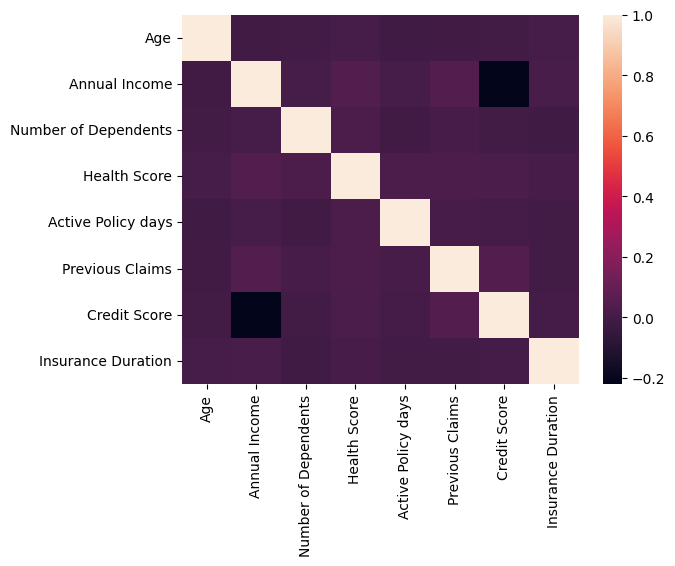

In [109]:
heatmap = sns.heatmap(corr_matrix)


#### Q. 6: Which of the following columns have missing values?

Gender

Age

Credit Score

Customer Feedback

Education Level

In [110]:
df.isna().sum()

,0
Age,153
Gender,0
Annual Income,372
Number of Dependents,929
Education Level,0
Health Score,627
Location,0
Policy Type,0
Active Policy days,0
Previous Claims,0


### Q. 7: Split the dataset into train dataset and test dataset in the following manner.

Use sklearn train_test_split function to split the data.
Use only 20% data as test_set and keep random_state = 42
How many training labels(y_train) are considered outliers.

In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Outliers are defined as values that exceed the upper bound (Third Quartile + 1.5 x Interquartile Range) or fall below the lower bound (First Quartile - 1.5 x Interquartile Range)?

In [112]:
outliers = y_train[(y_train > y_train.quantile(0.75) + 1.5 * (y_train.quantile(0.75) - y_train.quantile(0.25)))
 | (y_train < y_train.quantile(0.25) - 1.5 * (y_train.quantile(0.75) - y_train.quantile(0.25)))]

outliers.shape[0]

325

### Q. 8:
Replace missing values in the Agefeature with the Median.

Replace missing values in the Annual Income feature with the Mean.

Replace missing values in the Number of Dependents feature with the
Most Frequent.

Replace missing values in the Health Score feature with the Median.

Replace missing values in the Credit Score feature with the Constant value 0 (zero as integer data type).

Replace missing values in the Customer Feedback feature with the Most Frequent value.


In [113]:
imputed_df = X_train.copy()

imputed_df["Age"] = X_train["Age"].replace(np.nan, X_train["Age"].median())
imputed_df["Annual Income"] = X_train["Annual Income"].replace(np.nan, X_train["Annual Income"].mean())
imputed_df["Number of Dependents"] = X_train["Number of Dependents"].replace(np.nan, X_train["Number of Dependents"].mode()[0])
imputed_df["Health Score"] = X_train["Health Score"].replace(np.nan, X_train["Health Score"].median())
imputed_df["Credit Score"] = X_train["Credit Score"].replace(np.nan, 0)
imputed_df["Customer Feedback"] = X_train["Customer Feedback"].replace(np.nan, X_train["Customer Feedback"].mode()[0])

In [132]:
imputed_df["Age"].median()

41.0

### Q. 9:

In [133]:
imputed_df["Customer Feedback"].mode()[0]

'Average'

In [116]:
imputed_df.isna().sum()

,0
Age,0
Gender,0
Annual Income,0
Number of Dependents,0
Education Level,0
Health Score,0
Location,0
Policy Type,0
Active Policy days,0
Previous Claims,0



### Q. 10:
**For Categorical Features**

Ordinally Encode "Education Level", "Exercise Frequency" features because there are too many categories and to handle dimensionality of features.
** **
**Nominal Features**

One-Hot Encode "Gender", "Smoking Status", "Location", "Policy Type", "Customer Feedback", "Property Type" features and keep drop_first = True.
** **
**Scaling Features**

Scale all the features (transformed categorical and numerical) of the feature matrix using the StandardScaler

In [117]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer


ordinal_features = ["Education Level", "Exercise Frequency"]
nominal_features = ["Gender", "Smoking Status", "Location", "Policy Type", "Customer Feedback", "Property Type"]

preprocessor = ColumnTransformer(
    transformers=[
        ('ordinal', OrdinalEncoder(), ordinal_features),
        ('nominal', OneHotEncoder(drop='first', handle_unknown='ignore'), nominal_features),
        ('scaler', StandardScaler(), list(set(imputed_df.columns) - set(ordinal_features) - set(nominal_features))),
    ], remainder='passthrough'
)


X_train_processed = preprocessor.fit_transform(imputed_df)


#### Calculate the sum of all the values present in first 100 rows of the transformed test feature matrix ? (upto 2 digits afer the decimal)

In [118]:
sum = X_train_processed[:100].sum()
sum

641.028700254707

# Unit 2 of 2: Model Building

# Please regularly save your Answers in the exam portal by clicking on "Submit" button

### Q.1:

In [119]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('MLP25T1_modelBuilding_V3.csv')
df.head()

Saving MLP25T1_modelBuilding_V3.csv to MLP25T1_modelBuilding_V3 (1).csv


,Education Level,Exercise Frequency,Gender_Male,Smoking Status_Yes,Location_Suburban,Location_Urban,Policy Type_Comprehensive,Policy Type_Premium,Customer Feedback_Good,Customer Feedback_Poor,...,Property Type_House,Age,Health Score,Annual Income,Number of Dependents,Credit Score,Active Policy days,Previous Claims,Insurance Duration,Premium Amount
0,1.346249,-0.449384,0.995261,0.985357,1.386305,-0.710158,1.397931,-0.714345,-0.665193,-0.667931,...,1.416072,-1.525422,-0.068549,-1.008093,-0.810078,-0.406669,-0.503030,-0.739533,-0.031898,29.0
1,-0.448899,1.327277,0.995261,-1.014860,-0.721342,1.408137,1.397931,-0.714345,1.503324,-0.667931,...,-0.706179,0.569039,0.656574,-0.284874,-0.084851,0.654296,-1.603091,-0.739533,-1.190052,1408.0
2,0.448675,-1.337715,0.995261,-1.014860,-0.721342,1.408137,-0.715343,1.399884,1.503324,-0.667931,...,-0.706179,1.167457,0.191676,-1.004515,0.640375,-0.825018,-0.920823,-0.739533,-0.417949,321.0
3,-1.346474,-1.337715,-1.004761,0.985357,-0.721342,-0.710158,-0.715343,-0.714345,-0.665193,-0.667931,...,-0.706179,1.391863,0.359453,0.000000,-1.535304,0.943258,0.851924,-0.739533,-1.190052,358.0
4,0.448675,-0.449384,-1.004761,0.985357,1.386305,-0.710158,1.397931,-0.714345,-0.665193,-0.667931,...,-0.706179,-1.301016,0.623718,-0.474655,-1.535304,0.822498,-0.351627,0.335956,1.512309,642.0


### Q. 2: Split the dataset into train dataset and test dataset in the following manner for all of the Model Building section questions.

Premium Amount is the target column(y).
All the columns except the target column are in feature matrix(X).
Use sklearn train_test_split function to split the data
Use only 20% data as test_set and keep random_state = 42

(Common instructions for Q.2, Q.3 and Q.4)
Train the ridge model on the training data with the following parameters:
alpha = 10
solver = 'saga'
tol = 1e-4
random_state = 42
** **
<br>
Enter the value of R2 score on the test dataset.

-0.8 to -0.6

-0.5 to -0.3

 -0.1 to 0.1

 0.2 to 0.4

None of these

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

X = df.drop("Premium Amount", axis=1)
y = df["Premium Amount"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ridge_model = Ridge(alpha=10, solver='saga', tol=1e-4, random_state=42)
ridge_model.fit(X_train, y_train)

y_pred = ridge_model.predict(X_test)


r2_score(y_test, y_pred)

0.0034512934728205824

### Q. 3: Identify the index of the feature with the highest absolute coefficient value. Note that index starts from 0. (Ignore Intercept)

In [121]:
abs(ridge_model.coef_).argmax()

18

### Q. 4: Identify the index of the feature with the lowest absolute coefficient value. Note that index starts from 0. (Ignore Intercept)

In [122]:
abs(ridge_model.coef_).argmin()

12

### Q. 5: Take SGDRegressor(random_state = 42) estimator with GridSearchCV. Hyperparameter tuning to be done over the following parameters:

penalty as ['l1', 'l2','elasticnet']
alpha values as [1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
tol values as [1e-4, 1e-3, 1e-2, 1e-1]
Use cross validation = 5
Set scoring as neg_mean_absolute_error
refit = True

Use the best model from above hyper parameter tuning process to answer following questions:
** **
<br>
What is the best penalty?

l1

l2

elastic_net

In [123]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'alpha': [1e-5, 1e-4, 1e-3, 1e-1],
    'tol': [1e-4, 1e-3, 1e-2, 1e-1]
}

sgd_model = SGDRegressor(random_state=42)

grid_search = GridSearchCV(sgd_model, param_grid, cv=5, scoring='neg_mean_absolute_error', refit=True)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print(best_model)
best_model.get_params()

SGDRegressor(alpha=0.1, penalty='l1', random_state=42, tol=0.0001)


{'alpha': 0.1,
 'average': False,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.01,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'invscaling',
 'loss': 'squared_error',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'penalty': 'l1',
 'power_t': 0.25,
 'random_state': 42,
 'shuffle': True,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

### Q. 6: what will be value of mean absolute error on the test dataset?



In [124]:
from sklearn.metrics import mean_absolute_error

y_pred = best_model.predict(X_test)
mean_absolute_error(y_test, y_pred)

655.4981773143583

### Q. 7: Create a pipeline of the PCA() as transformer and Lasso as an estimator.
Use GridSearchCV for tuning the hyperparameters of the created pipeline on training dataset.

Values of n_components for PCA to be [0.9, 0.95]

lasso alpha value to be taken as : [10, 1, 0.01, 0.001]

scoring : neg_mean_absolute_error.

Use 5 fold cross validation.

n_jobs = -1 (negative one)
[it helps in using all the computational power to run this job]

In [125]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([
    ('pca', PCA()),
    ('lasso', Lasso())
])

param_grid = {
    'pca__n_components': [0.9, 0.95],
    'lasso__alpha': [10, 1, 0.01, 0.001]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pca', PCA()), ('lasso', Lasso())]),
             n_jobs=-1,
             param_grid={'lasso__alpha': [10, 1, 0.01, 0.001],
                         'pca__n_components': [0.9, 0.95]},
             scoring='neg_mean_absolute_error')

### If we fit the pipeline on the training dataset, what will be the Root Mean Squared Error on the test dataset?

In [126]:
from math import sqrt
from logging import root
from sklearn.metrics import mean_squared_error

y_pred = grid_search.predict(X_test)
mean_squared_error(y_test, y_pred)
rmse = sqrt(mean_squared_error(y_test, y_pred))
rmse

865.9116938818679

### Q. 8: What is the percentage of variance explained by the first principle component on training dataset? Choose the option that contains the correct range for the answer.

In [127]:
pca = PCA(n_components=0.95)
pca.fit(X_train)
explained_variance_ratio = pca.explained_variance_ratio_[0]
explained_variance_ratio * 100


7.822409321688081

### Q. 9: Create a pipeline of the PolynomialFeatures as transformer and Lasso as an estimator with the following parameters:
For PolynomialFeatures:
	interaction_only = False
	degree = 2

For Lasso:
	alpha = 1
	warm_start = True
	random state as 0

In [128]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('poly', PolynomialFeatures(interaction_only=False, degree=2)),
    ('lasso', Lasso(alpha=1, warm_start=True, random_state=0))
])

### Fit the pipeline on the training dataset and find the Mean Square Error on the test dataset.

In [129]:
from sklearn.metrics import mean_squared_error

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
mean_squared_error(y_test, y_pred)

764706.3357480679

### Q. 10: Create a pipeline for feature selection using f_regression as transformer and SGDRegressor as an estimator with the following parameters:

For feature selection:
	select best 5 features based on f_regression score

For SGDRegressor:
	random state as 42
  ** **
Fit the pipeline on the training dataset and select the option that correctly displays the feature names in descending order based on their f_regression scores.


['Previous Claims', 'Location_Urban', 'Annual Income', 'Education Level', 'Active Policy days']


['Previous Claims', 'Customer Feedback_Good', 'Annual Income', 'Property Type_House', 'Health Score']


 ['Previous Claims', 'Policy Type_Comprehensive', 'Health Score', 'Annual Income', 'Credit Score']


['Previous Claims', 'Location_Urban', 'Health Score', 'Education Level', 'Customer Feedback_Good']


None of the Above

In [130]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('selector', SelectKBest(score_func=f_regression, k=5)),
    ('regressor', SGDRegressor(random_state=42))
])

pipeline.fit(X_train, y_train)
feature_names = X_train.columns
feature_scores = pipeline.named_steps['selector'].scores_
sorted_indices = np.argsort(feature_scores)[::-1]
sorted_feature_names = feature_names[sorted_indices]
sorted_feature_names

Index(['Previous Claims', 'Policy Type_Comprehensive', 'Health Score',
       'Annual Income', 'Credit Score', 'Property Type_House',
       'Smoking Status_Yes', 'Customer Feedback_Good', 'Education Level',
       'Customer Feedback_Poor', 'Insurance Duration', 'Gender_Male',
       'Number of Dependents', 'Exercise Frequency', 'Location_Urban',
       'Policy Type_Premium', 'Property Type_Condo', 'Active Policy days',
       'Age', 'Location_Suburban'],
      dtype='object')

### Q. 11: For SGDRegressor, what is the actual number of iterations completed during model training?

In [131]:
best_model.n_iter_

19